In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import roc_auc_score, fbeta_score, confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve

In [2]:
bcancer = sklearn.datasets.load_breast_cancer()
df_bcancer = pd.DataFrame(bcancer.data, columns= bcancer.feature_names)
df = df_bcancer.copy()

In [3]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
df['label'] = bcancer.target

In [5]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [7]:
df.shape

(569, 31)

In [8]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [9]:
df['label'].value_counts()

## Heavily imbalanced 

label
1    357
0    212
Name: count, dtype: int64

<Axes: >

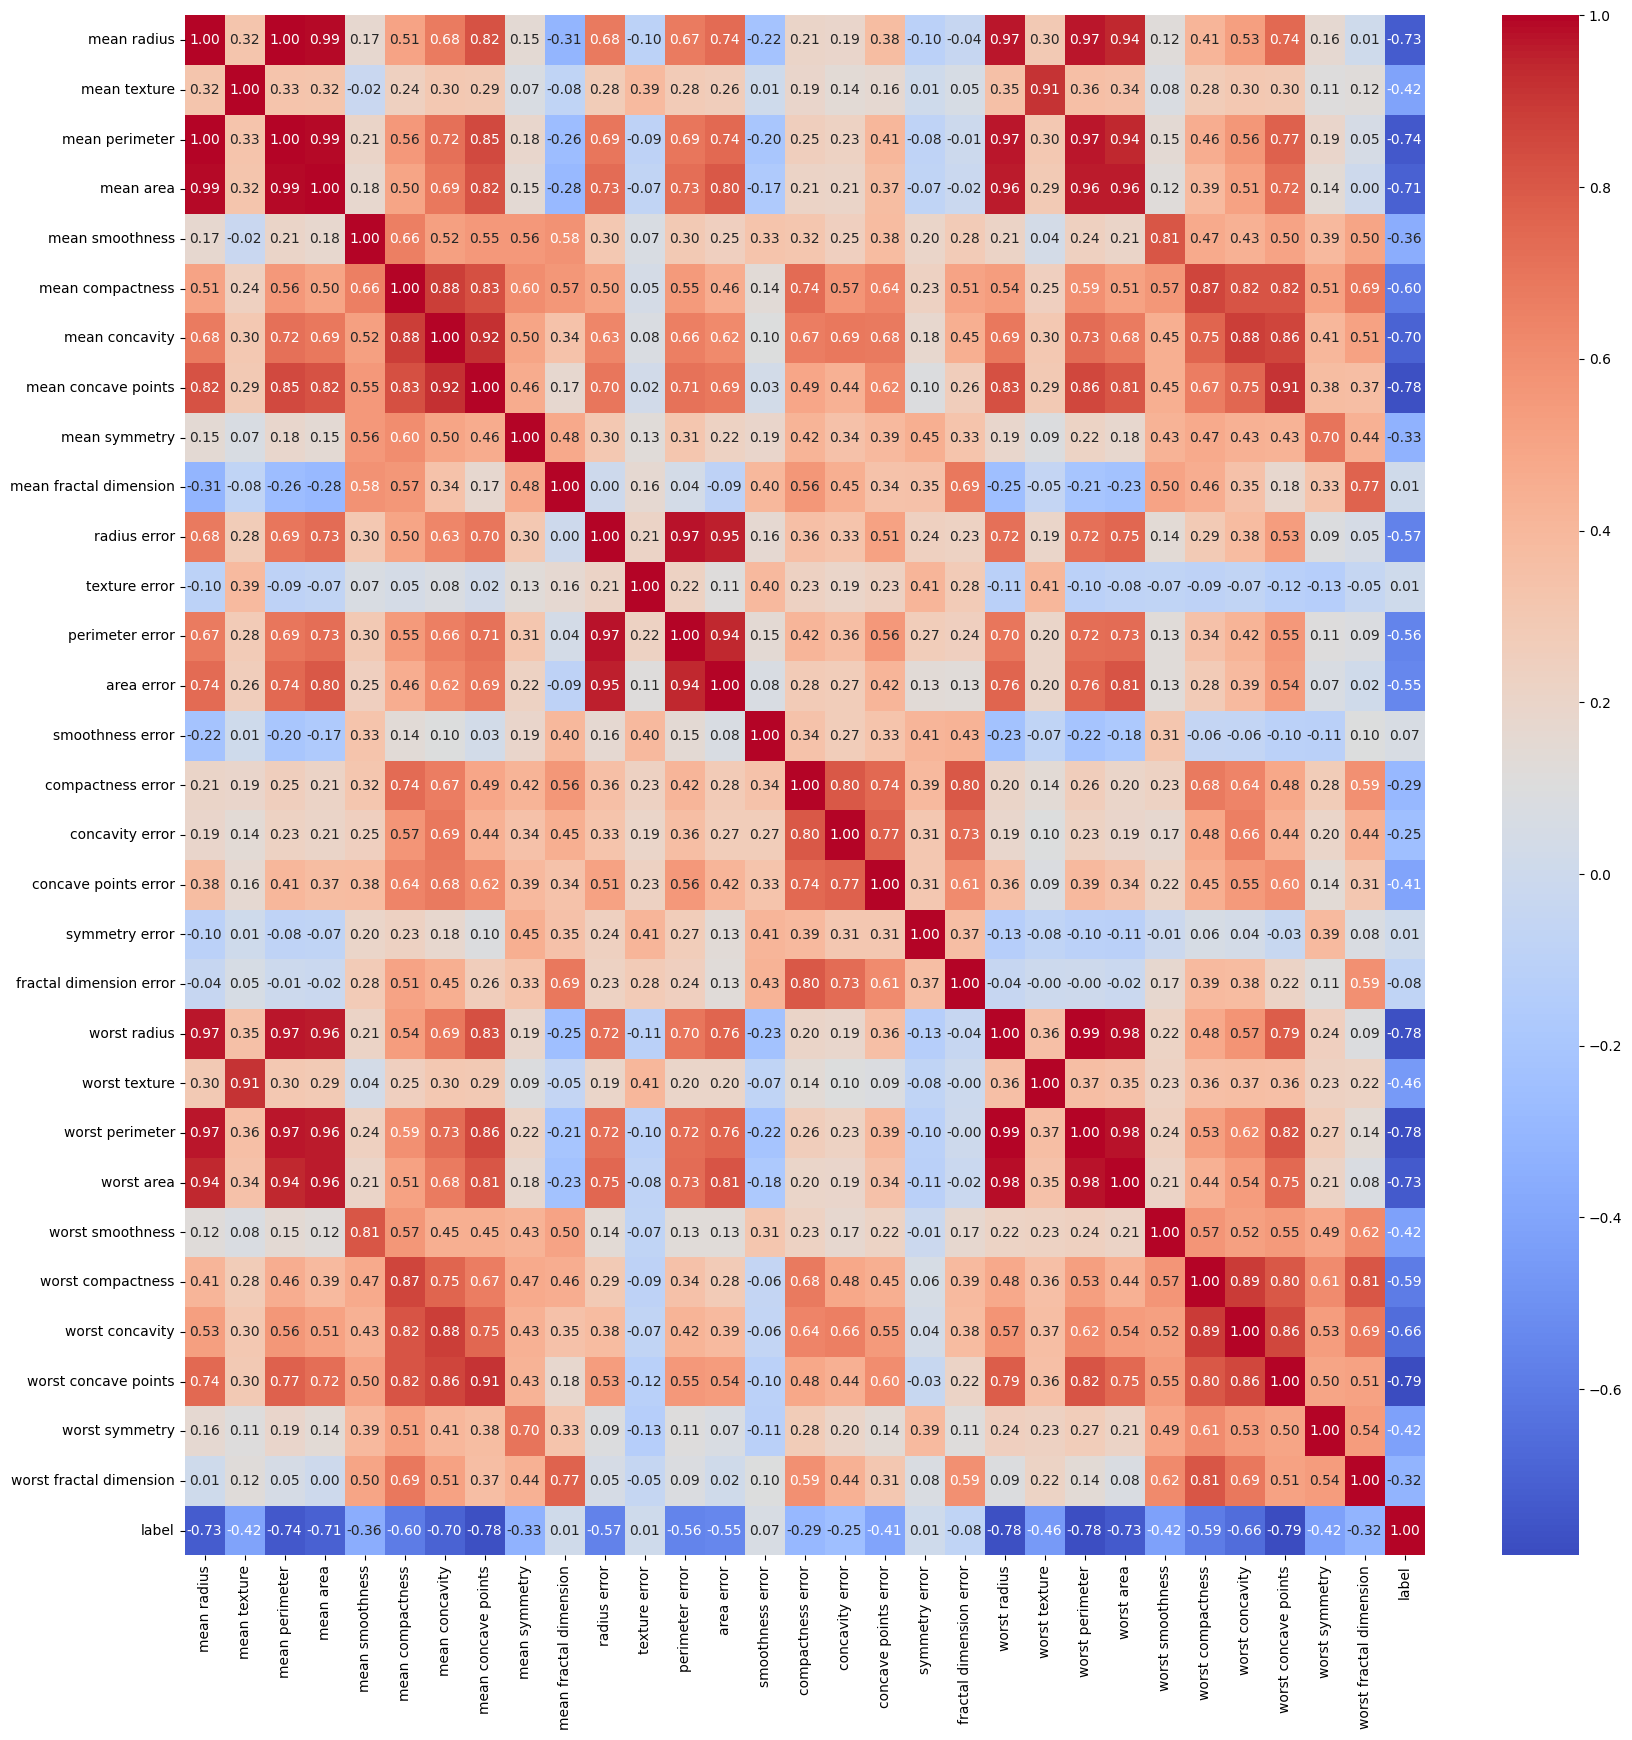

In [10]:
plt.figure(figsize= (20,20))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm', fmt = '.2f')

In [11]:
corr_matrix = df.corr().abs()

upper = corr_matrix.where(
    np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
)

high_corr = [
    (col, row, upper.loc[row, col])
    for col in upper.columns
    for row in upper.index
    if not np.isnan(upper.loc[row, col]) and upper.loc[row, col] > 0.85
]

for col1, col2, corr in high_corr:
    print(f"{col1} -- {col2}: {corr:.2f}")

mean perimeter -- mean radius: 1.00
mean area -- mean radius: 0.99
mean area -- mean perimeter: 0.99
mean concavity -- mean compactness: 0.88
mean concave points -- mean perimeter: 0.85
mean concave points -- mean concavity: 0.92
perimeter error -- radius error: 0.97
area error -- radius error: 0.95
area error -- perimeter error: 0.94
worst radius -- mean radius: 0.97
worst radius -- mean perimeter: 0.97
worst radius -- mean area: 0.96
worst texture -- mean texture: 0.91
worst perimeter -- mean radius: 0.97
worst perimeter -- mean perimeter: 0.97
worst perimeter -- mean area: 0.96
worst perimeter -- mean concave points: 0.86
worst perimeter -- worst radius: 0.99
worst area -- mean radius: 0.94
worst area -- mean perimeter: 0.94
worst area -- mean area: 0.96
worst area -- worst radius: 0.98
worst area -- worst perimeter: 0.98
worst compactness -- mean compactness: 0.87
worst concavity -- mean concavity: 0.88
worst concavity -- worst compactness: 0.89
worst concave points -- mean concavi

In [12]:
col_removed = [
 'mean radius',
 'mean perimeter',
 'mean area',
 'mean compactness',
 'mean concavity',
 'mean concave points',
 'radius error',
 'perimeter error',
 'area error',
 'mean texture',
 'symmetry error',
 'fractal dimension error',
 'mean fractal dimension',
 'mean symmetry',    
]

df = df.drop(columns= col_removed)


<Axes: >

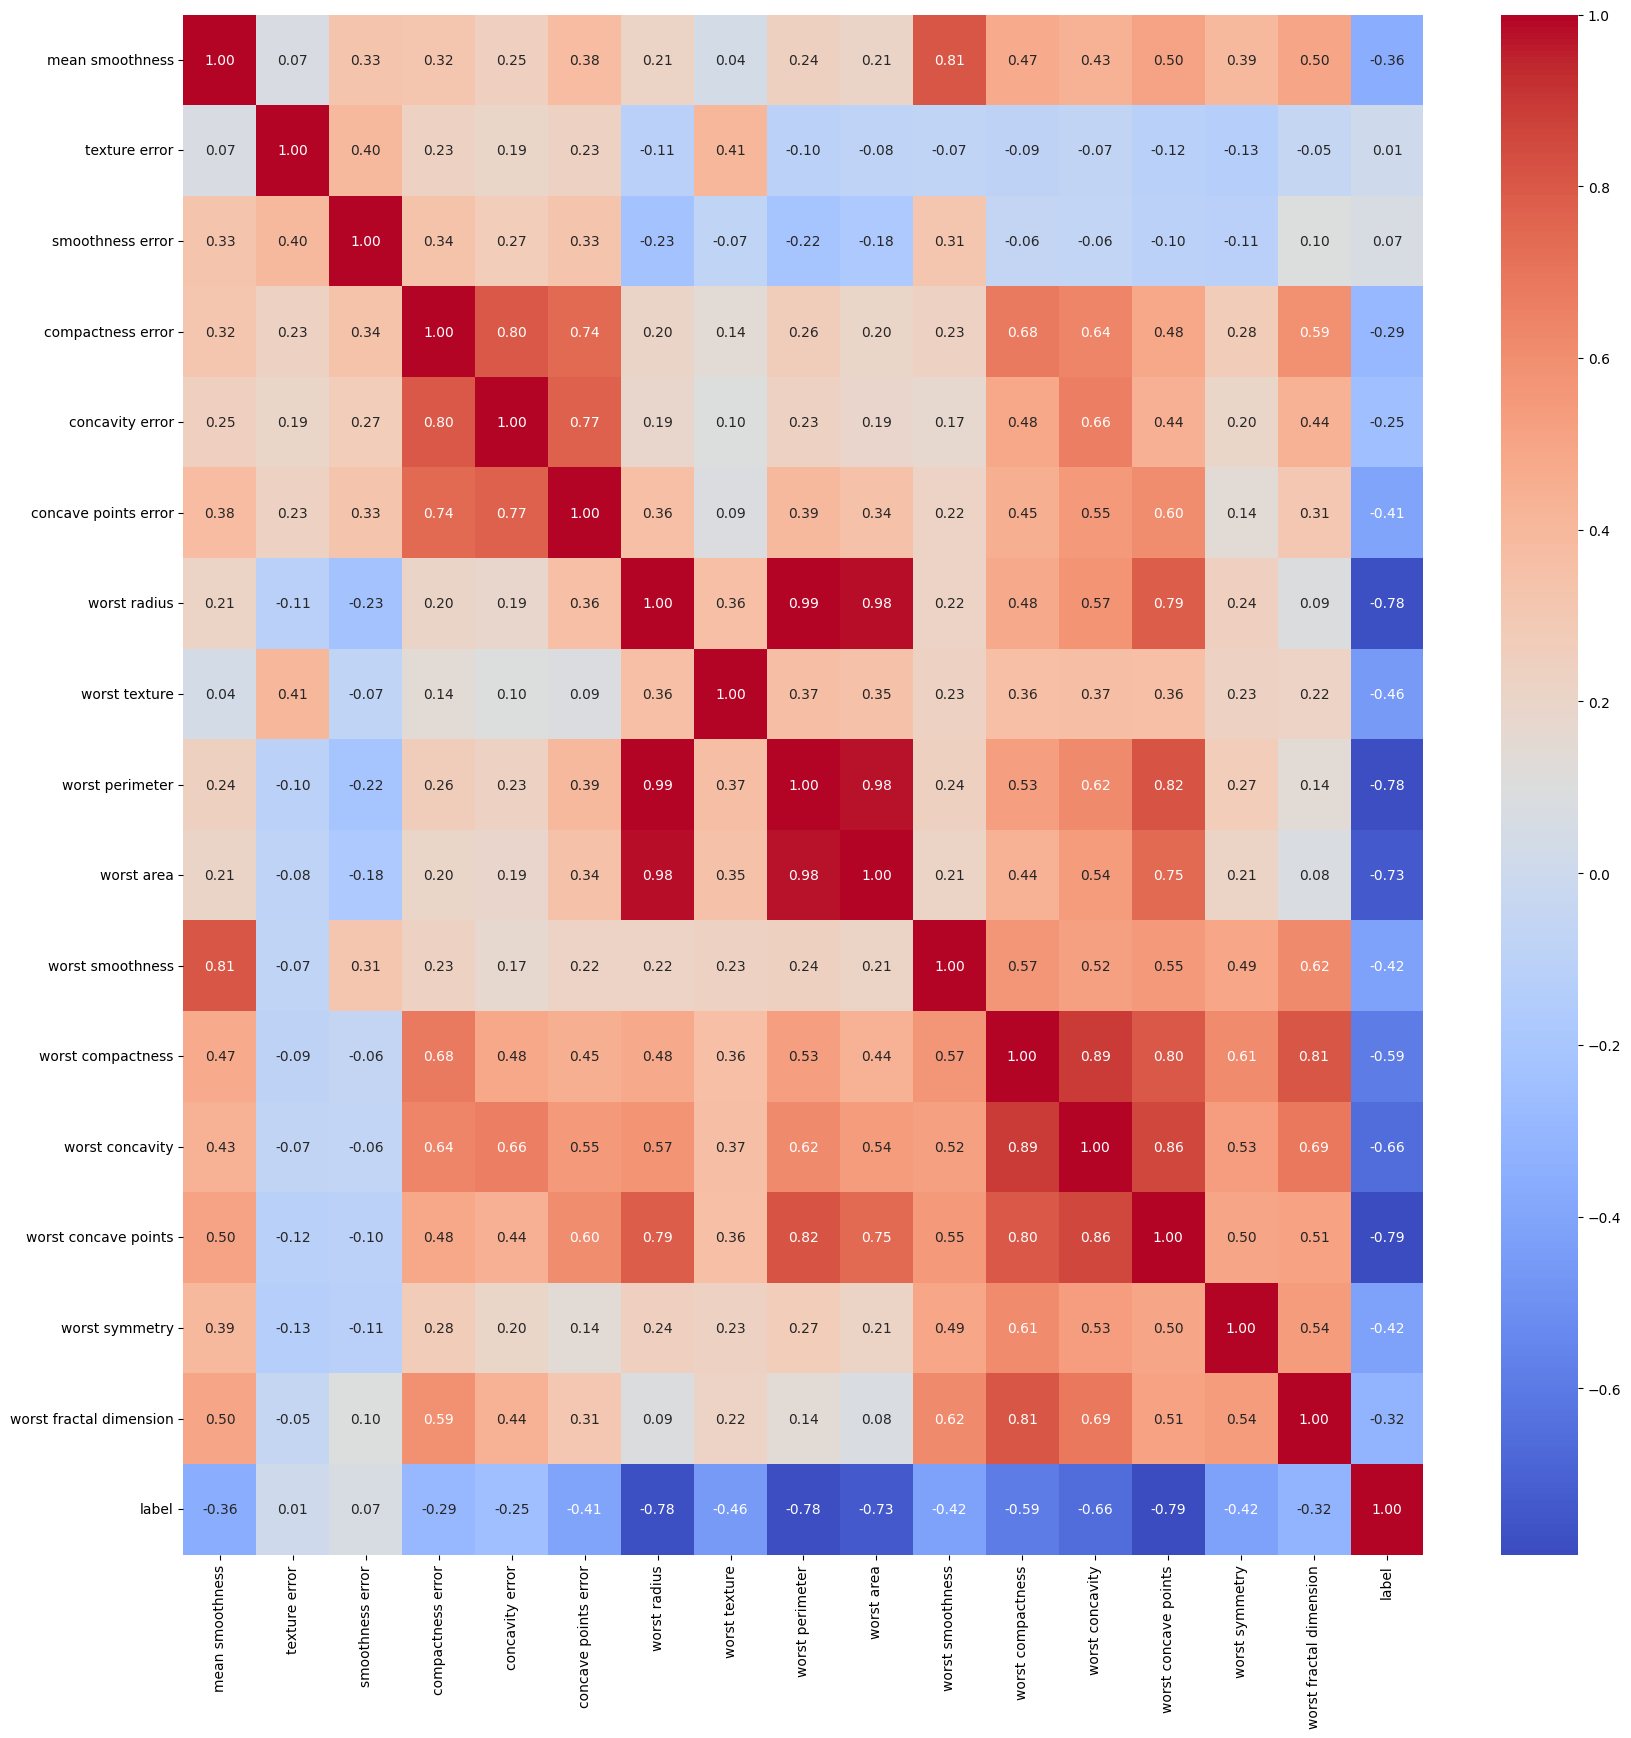

In [13]:
plt.figure(figsize= (20,20))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm', fmt = '.2f')

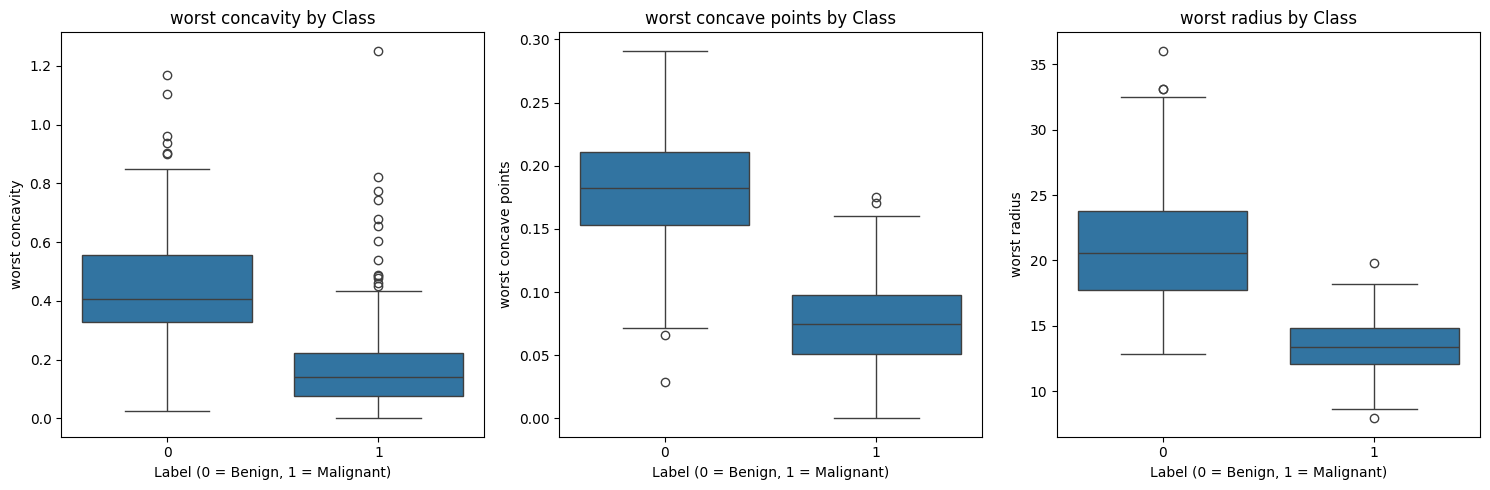

In [14]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

feature_check = ['worst concavity', 'worst concave points', 'worst radius']

for i, feat in enumerate(feature_check):
    sns.boxplot(x='label', y=feat, data=df, ax=axes[i])
    axes[i].set_title(f'{feat} by Class')
    axes[i].set_xlabel('Label (0 = Benign, 1 = Malignant)')
    axes[i].set_ylabel(feat)

plt.tight_layout()
plt.show()


Across all three selected features — worst concavity, worst concave points, and worst radius — the malignant tumors (label = 1) generally exhibit higher values than benign tumors (label = 0).
This indicates that malignant tumors tend to have:
• Larger physical size (higher worst radius)
• Significantly more irregular and sharp edges (higher concavity values)

These patterns suggest that tumor geometry plays a major role in classifying malignancy, which justifies the inclusion of these features in the final model.

In [15]:
X = df.drop(columns= 'label')
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, stratify= y, random_state= 2)

In [16]:
scaler = RobustScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
class_weight = compute_class_weight(
    class_weight= 'balanced',
    classes= np.unique(y_train),
    y = y_train
)

class_weight = dict(zip(np.unique(y_train), class_weight))
print (class_weight)

{np.int64(0): np.float64(1.338235294117647), np.int64(1): np.float64(0.7982456140350878)}


In [18]:
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.2),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

c:\Users\jaraneses\OneDrive - 2X LLC\Codes\.venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [20]:
es = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)

In [21]:
history = model.fit(
    X_train_scaled, y_train,
    validation_data=(X_test_scaled, y_test),
    epochs=200,
    batch_size=32,
    class_weight=class_weight,
    callbacks=[es, rlr],
    verbose=1
)


Epoch 1/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.5209 - loss: 0.7207 - val_accuracy: 0.6491 - val_loss: 0.6599 - learning_rate: 0.0010
Epoch 2/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.6769 - loss: 0.6470 - val_accuracy: 0.7368 - val_loss: 0.6119 - learning_rate: 0.0010
Epoch 3/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7341 - loss: 0.5950 - val_accuracy: 0.8070 - val_loss: 0.5602 - learning_rate: 0.0010
Epoch 4/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7824 - loss: 0.5391 - val_accuracy: 0.8421 - val_loss: 0.5055 - learning_rate: 0.0010
Epoch 5/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8132 - loss: 0.4883 - val_accuracy: 0.8684 - val_loss: 0.4516 - learning_rate: 0.0010
Epoch 6/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8374 - loss: 0.4540 - val_accuracy: 0.8772 - val_loss: 0.3997 - learning_rate: 0.0010
Epoch 7/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8374 - loss: 0.4157 - 

In [23]:
y_proba = model.predict(X_test_scaled).ravel()
roc_auc = roc_auc_score(y_test, y_proba)
print(f"ROC AUC: {roc_auc:.3f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
ROC AUC: 0.995


The Artificial Neural Network achieved a ROC-AUC of 0.995, indicating near-perfect discrimination between malignant and benign tumors. Using a threshold optimized for the F2-score, the model obtained 100% recall for malignant cases with only a single false positive. This demonstrates the potential of neural networks as a reliable decision-support tool in breast cancer diagnosis, particularly in minimizing false negatives where clinical consequences are highly critical.

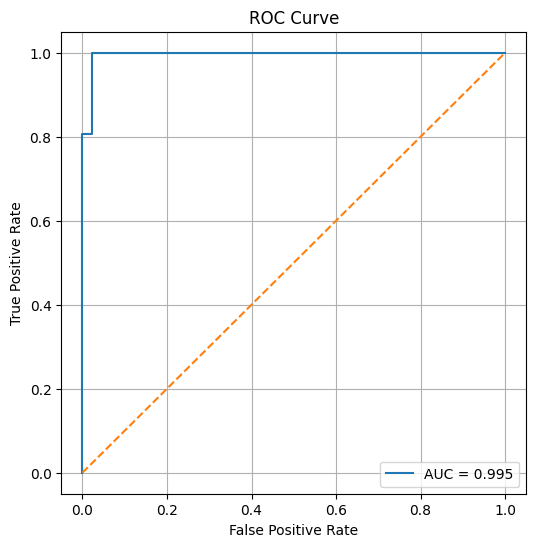

In [33]:
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0,1],[0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()

The ROC curve demonstrates excellent separability between classes, with an AUC of 0.995. This indicates the model can almost perfectly discriminate malignant from benign tumors.

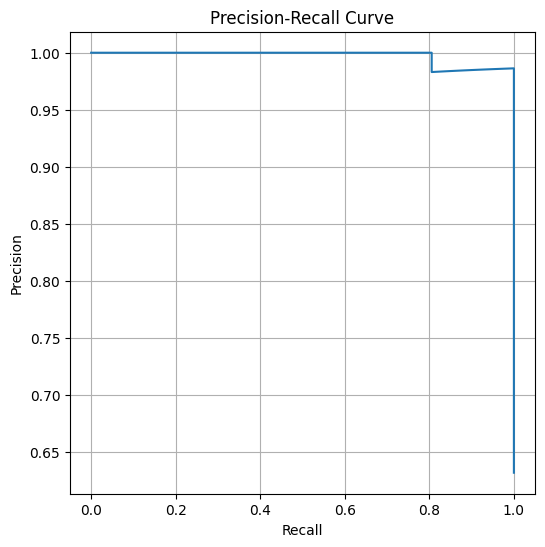

In [34]:
prec, rec, _ = precision_recall_curve(y_test, y_proba)

plt.figure(figsize=(6,6))
plt.plot(rec, prec)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.grid()
plt.show()

The Precision–Recall Curve demonstrates that the neural network achieves both high precision and high recall across a wide range of decision thresholds. Precision remains close to 100% for recall values up to 0.8 and declines only slightly thereafter, indicating the model can reliably detect malignant tumors while minimizing false alarms. This is particularly important for breast cancer diagnosis, where missing cancer cases is clinically unacceptable.

In [27]:
thresholds = np.linspace(0.01, 0.99, 99)
f2_scores = [fbeta_score(y_test, (y_proba>=t).astype(int), beta=2) for t in thresholds]
best_t = thresholds[int(np.argmax(f2_scores))]

print(f"Best threshold by F2: {best_t:.2f}  (F2={max(f2_scores):.3f})")

Best threshold by F2: 0.33  (F2=0.997)


In [30]:
y_pred = (y_proba >= best_t).astype(int)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix (tuned):\n", cm)

print("\nClassification Report (tuned):\n", classification_report(y_test, y_pred, digits=3))

Confusion Matrix (tuned):
 [[41  1]
 [ 0 72]]

Classification Report (tuned):
               precision    recall  f1-score   support

           0      1.000     0.976     0.988        42
           1      0.986     1.000     0.993        72

    accuracy                          0.991       114
   macro avg      0.993     0.988     0.991       114
weighted avg      0.991     0.991     0.991       114



Out of 114 test samples, the model correctly identified all 72 malignant tumors (100% recall), meaning no patient with cancer would be incorrectly classified as benign. Only one benign tumor was misclassified as malignant (false positive). This demonstrates the model’s strong reliability in minimizing the critical risk of undetected cancer cases.